Загрузить файл hr.csv

In [2]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
hr = pd.read_csv('hr.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [5]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
hr.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [7]:
hr.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


Рассчитать и визуализировать корреляционную матрицу для переменных

In [47]:
def salary2num(salary):
    if salary == 'low':
        return 1
    if salary == 'medium':
        return 2
    if salary == 'high':
        return 3

hr['salary_num'] = hr.salary.apply(salary2num)

In [48]:
corr = hr.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,cnt_in_dep,salary_num
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.003635,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.011733,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.001039,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.005228,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.013243,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,-0.005093,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.026097,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.026501,0.098119
cnt_in_dep,0.003635,-0.011733,0.001039,0.005228,-0.013243,-0.005093,0.026097,-0.026501,1.000000,-0.066756
salary_num,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,-0.066756,1.000000


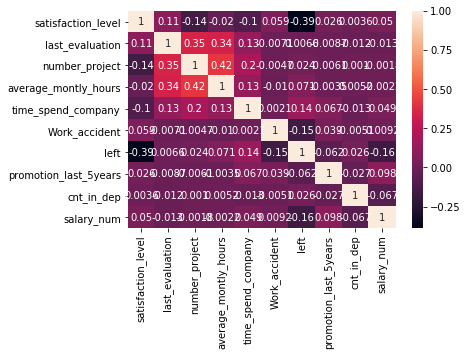

In [49]:
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Визуализировать несколько взаимосвязей между переменными

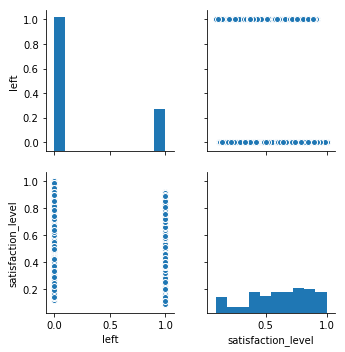

In [10]:
sns.pairplot(hr, vars=['left', 'satisfaction_level'], kind='scatter')

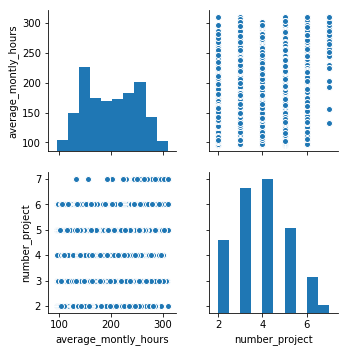

In [11]:
sns.pairplot(hr, vars=['average_montly_hours', 'number_project'], kind='scatter')

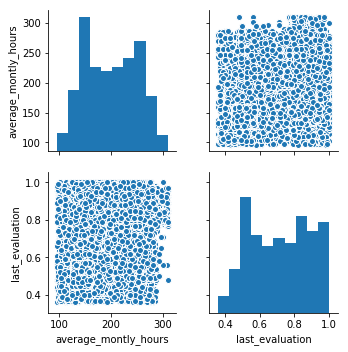

In [12]:
sns.pairplot(hr, vars=['average_montly_hours', 'last_evaluation'], kind='scatter')

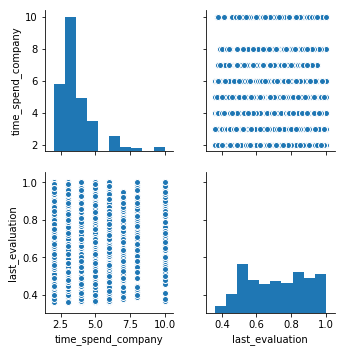

In [13]:
sns.pairplot(hr, vars=['time_spend_company', 'last_evaluation'], kind='scatter')

С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [14]:
stats.ttest_ind(hr['left'], hr['satisfaction_level'])

Ttest_indResult(statistic=-93.06077566920372, pvalue=0.0)

In [15]:
stats.ttest_ind(hr['average_montly_hours'], hr['number_project'])

Ttest_indResult(statistic=483.54229603425085, pvalue=0.0)

In [16]:
stats.ttest_ind(hr['average_montly_hours'], hr['last_evaluation'])

Ttest_indResult(statistic=491.25647025928, pvalue=0.0)

In [17]:
stats.ttest_ind(hr['time_spend_company'], hr['last_evaluation'])

Ttest_indResult(statistic=231.7670054076573, pvalue=0.0)

Рассчитать сколько работников работает в каждом департаменте

In [18]:
hr['cnt_in_dep'] = hr.groupby('sales')['sales'].transform('count')
hr[['sales', 'cnt_in_dep']].drop_duplicates()

,sales,cnt_in_dep
0,sales,4140
28,accounting,767
31,hr,739
35,technical,2720
46,support,2229
60,management,630
61,IT,1227
66,product_mng,902
77,marketing,858
301,RandD,787


Показать распределение сотрудников по зарплатам

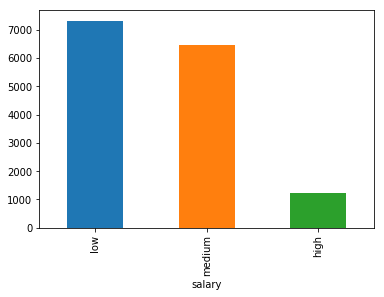

In [41]:
hr.groupby('salary')['salary'].count().sort_values(ascending=False).plot(kind='bar')

Показать распределение сотрудников по зарплатам совместно с департаментами

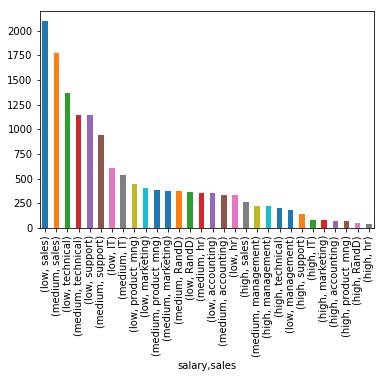

In [44]:
hr.groupby(['salary', 'sales'])['salary'].count().sort_values(ascending=False).plot(kind='bar')

Сколько сотрудников покинули компанию

In [45]:
hr.groupby('left')['left'].count()

left
0    11428
1     3571
Name: left, dtype: int64

Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

гипотеза: компанию покидают недовольные сотрудники - подтверждается

In [46]:
stats.ttest_ind(hr['left'], hr['satisfaction_level'])

Ttest_indResult(statistic=-93.06077566920372, pvalue=0.0)

гипотеза: компанию покидают сотрудники с низкими зарплатами - подтверждается

In [51]:
stats.ttest_ind(hr['left'], hr['salary_num'])

Ttest_indResult(statistic=-216.77971097984647, pvalue=0.0)

гипотеза: компанию покидают сотрудники, которых давно не повышали - подтверждается

In [52]:
stats.ttest_ind(hr['left'], hr['last_evaluation'])

Ttest_indResult(statistic=-127.53627018536089, pvalue=0.0)